<a href="https://colab.research.google.com/github/anirudhssundar/optimal_control/blob/main/6553_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def get_p(x1,x2,r,dt):
  # p = [x[-1]]

  

  p1 = [0]
  p2 = [0]
  x1_rev = x1[::-1]
  x2_rev = x2[::-1]
  for i in range(1,len(x1)):
    # p_t_minus_dt = p[-1]*(1-dt) + 2*x_rev[i]*dt
    p2_t_minus_dt = p2[-1] - dt*(p2[-1]/(2*np.sqrt(x2_rev[i])) - 4*(x2_rev[i]-r))
    p2.append(p2_t_minus_dt)

    p1_t_minus_dt = p1[-1] - dt*(p1[-1]/(2*np.sqrt(x1_rev[i])) - p2[-1]/(2*np.sqrt(x1_rev[i])))
    p1.append(p1_t_minus_dt)
  return np.array(p1[::-1]), np.array(p2[::-1])

In [37]:
def get_u(t1,t2,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t1:
      dynu.append(2)
    elif (foo*dt>=t1) and (foo*dt<t2):
      dynu.append(1)
    else:
      dynu.append(2)
  return dynu

In [38]:
def J(x,r,dt):
  val = 2*np.sum((x - r)**2)*dt
  return val

In [ ]:
def J_vec(x,r,dt):
  val = 2*np.sum((x))

In [39]:
def dyn_u(t1,t2,dt):
  dynu = get_u(t1,t2,dt)
  dynx = get_trajectory(dynu,1.5,dt)
  cost = J(dynx,2.5,dt)
  return cost

In [40]:
def get_trajectory_x1(u,x1_0,dt):
  x = x1_0
  x_fin = []
  x_fin.append(x1_0)
  for i in u:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin[:-1])

In [41]:
def get_trajectory_x2(x1,x2_0,dt):
  x = x2_0
  x_fin = []
  x_fin.append(x2_0)
  for i in x1:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin[:-1])

In [42]:
def minimize_hamiltonian(p1,p2,x1,x2,dt):
  conv_u = np.arange(1,2,0.01)
  # minimize p1f1 + p2f2 +L -> same as minimizing p1f1 since u doesnt appear in f2
  v_i = []
  for i in range(len(p1)):
    min_index = np.argmin(p1[i]*(conv_u-np.sqrt(x1[i])))
    v_i.append(conv_u[min_index])
  return np.array(v_i)

In [43]:
x_0 = 1.5
# t = 10
r = 2.5
t = np.arange(1000)
dt = 0.01
alpha=0.2
beta=0.5
tol = 1e-4

# for split in np.arange(5,7):
t_1 = 3
t_2 = 9

u = get_u(t_1,t_2,dt)
x = np.array(get_trajectory(u,x_0,dt))
p = get_p(x,dt)
iters = 0

# ARMIJO STUFF
if abs(p[int(t_1*dt)])<tol:
  print("done")
else:
  while abs(p[int(t_1*dt)])>tol:
    if iters==8:
      break
    k=0
    while dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],t_2,dt) > dyn_u(t_1,t_2,dt) -alpha*(beta**k)*(p[int(t_1*dt)]**2):
      k+=1
      # print(k)
      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))

      if k==20:
        break
    lambd = -(beta**k)/(beta**2)
    # beta = beta*2
    t_1 = t_1 + lambd*p[int(t_1*dt)]
    plt.scatter(iters, dyn_u(t_1,t_2,dt))
    print("t changed",t_1)

    u_new = get_u(t_1,t_2,dt)
    x_new = get_trajectory(u_new, x_0,dt)
    p = get_p(x_new,dt)
    iters+=1


alpha=0.2
beta=0.5
iters=0
if abs(p[int(t_2*dt)])<tol:
  print("done")
else:
  while abs(p[int(t_2*dt)])>tol:
    if iters==8:
      break
    k=0
    while dyn_u(t_1,t_2 - (beta**k)*p[int(t_2*dt)],dt) > dyn_u(t_1,t_2,dt) -alpha*(beta**k)*(p[int(t_2*dt)]**2):
      k+=1
      # print(k)
      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))

      if k==10:
        break
    lambd = -(beta**k)/(beta**2)
    # beta = beta*2
    t_2 = t_2 + lambd*p[int(t_2*dt)]
    plt.scatter(iters, dyn_u(t_1,t_2,dt))
    print("t changed",t_2)

    u_new = get_u(t_1,t_2,dt)
    x_new = get_trajectory(u_new, x_0,dt)
    p = get_p(x_new,dt)
    iters+=1
#  J = 0.5*np.sum((x - r)**2)*dt
  # print(split, J)
print(t_1)
print(t_2)
fin_u = get_u(t_1,t_2,dt)
fin_x = np.array(get_trajectory(fin_u,x_0,dt))
fin_p = get_p(fin_x,dt)
fin_cost = J(fin_x, r, dt)
print(fin_cost)

NameError: ignored

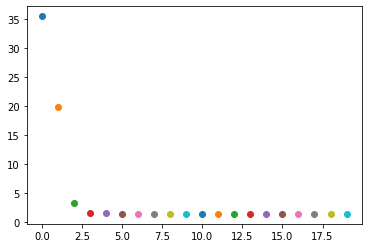

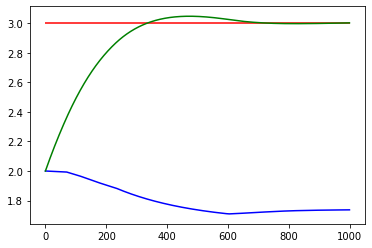

In [85]:
# Project
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
# plt.plot(x1)
# plt.plot(x2)
# p1 = get_p(x1,dt)
# p2 = get_p(x2,dt)
# plt.plot(p1)
# plt.plot(p2)
p1,p2 = get_p(x1,x2,r,dt)
alpha = 1e-4
beta = 0.5
tol = 1e-4

for j in range(20):
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)

  plt.scatter(j,J(x2,r,dt))

  p1,p2 = get_p(x1,x2,r,dt)
  v_i = minimize_hamiltonian(p1,p2,x1,x2,dt)

  theta_u = dt*np.sum(np.dot(p1, v_i - u))

  for l in range(10):

    convex_combination = (1 - beta**l)*u + (beta**l)*v_i

    x1_temp = get_trajectory_x1(convex_combination,x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp,x2_0,dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < alpha*(beta**l)*theta_u:
      # print(l)
      u = convex_combination
      # plt.plot(u)
      beta = beta/2
      break
x1_fin = get_trajectory_x1(u, x1_0,dt)
x2_fin = get_trajectory_x2(x1_fin, x2_0,dt)
plt.figure()
plt.plot(t,x1_fin,color='b')
plt.plot(t,x2_fin,color='g')
plt.hlines(y=3.0,xmin=0,xmax=1000,colors='r')

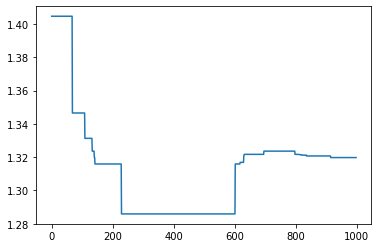

In [88]:
plt.plot(u[:-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


ValueError: ignored

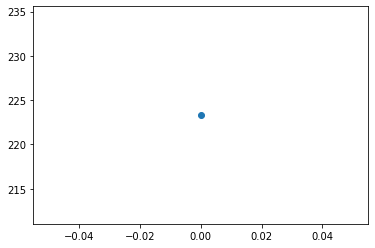

In [91]:
# Problem 1c
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(3000)
r = 3 + np.sin(0.12*np.pi*t)

u = np.ones(3000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
# plt.plot(x1)
# plt.plot(x2)
# p1 = get_p(x1,dt)
# p2 = get_p(x2,dt)
# plt.plot(p1)
# plt.plot(p2)
p1,p2 = get_p(x1,x2,r,dt)
alpha = 1e-4
beta = 0.5
tol = 1e-4

for j in range(20):
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)

  plt.scatter(j,J(x2,r,dt))

  p1,p2 = get_p(x1,x2,r,dt)
  v_i = minimize_hamiltonian(p1,p2,x1,x2,dt)

  theta_u = dt*np.sum(np.dot(p1, v_i - u))

  for l in range(10):

    convex_combination = (1 - beta**l)*u + (beta**l)*v_i

    x1_temp = get_trajectory_x1(convex_combination,x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp,x2_0,dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < alpha*(beta**l)*theta_u:
      # print(l)
      u = convex_combination
      # plt.plot(u)
      beta = beta/2
      break
x1_fin = get_trajectory_x1(u, x1_0,dt)
x2_fin = get_trajectory_x2(x1_fin, x2_0,dt)
plt.figure()
plt.plot(t,x1_fin,color='b')
plt.plot(t,x2_fin,color='g')
plt.hlines(y=3.0,xmin=0,xmax=1000,colors='r')

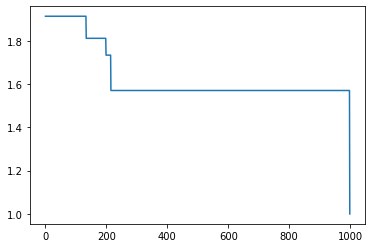

In [ ]:
plt.plot(u)

In [ ]:
x_fin = get_trajectory(u,x_0,dt)

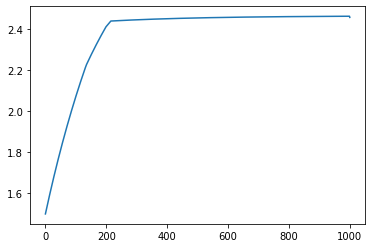

In [ ]:
plt.plot(x_fin)

In [ ]:
beta**l

0.001953125

In [ ]:
J(get_trajectory((1 - beta**l)*u + (beta**l)*u_new,x_0,dt),r,dt) - J(x,r,dt)

0.011193922073761797

In [ ]:
min_set = np.arange(1,2,0.01)
i=0
np.argmin(p[i]*min_set + np.sqrt(x[i]))


99

hi


In [96]:
type(r)

list